<a href="https://colab.research.google.com/github/aleksejalex/temp_rndmtx/blob/main/TNM_lec1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy as scp
import sympy as sp
import seaborn as sbn
import matplotlib.pyplot as plt
import pickle

In [ ]:
!pip install github

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 3.2.0
    Uninstalling charset-normalizer-3.2.0:
      Successfully uninstalled charset-normalizer-3.2.0
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.8.5
    Uninstalling aiohttp-3.8.5:
      Successfully uninstalled aiohttp-3.8.5


## definice a test fci

In [3]:
def generate_H(N: int = 8):
    H = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            if i!=j:
                mu = 0
                sigma = 1
                H[i,j] = mu + sigma * np.random.randn()
            else:
                mu = 0
                sigma = 2
                H[i,i] = mu + sigma * np.random.randn()
    return H

In [4]:
H = generate_H(3)
print(H)

[[-1.32069331  1.70020898 -0.59393515]
 [-0.37643509 -0.49307973  0.71286796]
 [ 0.25313515  0.25998189  1.48897766]]


In [5]:
def symmetrize(H):
    return (H+H.T) *(1/np.sqrt(2))

In [6]:
H_sym = symmetrize(H)
print(H_sym)

[[-1.86774239  0.9360495  -0.24098199]
 [ 0.9360495  -0.69732004  0.68790873]
 [-0.24098199  0.68790873  2.1057324 ]]


In [7]:
def get_eigs(H):
    spectral_analysis = np.linalg.eig(H)
    eig_vals = spectral_analysis[0]
    return eig_vals

In [8]:
get_eigs(H_sym)

array([-2.45293719, -0.27198502,  2.26559218])

## experiment

In [13]:
def experiment(name:str = 'none', num_of_dims_of_mtx: int = 3, print_result: bool = False):
    result = []
    K = generate_H(num_of_dims_of_mtx)
    K_sym = symmetrize(K)
    eigs = get_eigs(K_sym)
    result.extend(eigs.tolist())
    if print_result:
        print(result)
    return result

In [14]:
for _ in range(2):
    experiment(num_of_dims_of_mtx=3, print_result=True)

[5.156881911442781, -4.73861940279502, -1.0751171766576326]
[-0.6633181659499847, 2.792033054496112, 4.293056474609753]


In [ ]:
num_of_experiments = 100000
num_of_dims_of_mtx = 80
results = []
for i in range(num_of_experiments):
    K = generate_H(num_of_dims_of_mtx)
    K_sym = symmetrize(K)
    eigs = get_eigs(K_sym)
    #results.append(eigs)
    results.extend(eigs.tolist())

#print(results)

KeyboardInterrupt: ignored

In [ ]:
len(results)

5692880

In [ ]:
# save current experiment (manual use)
with open("exp_80mtx_100000exps_not_finished.pk1", "wb") as file:
    pickle.dump(results, file)

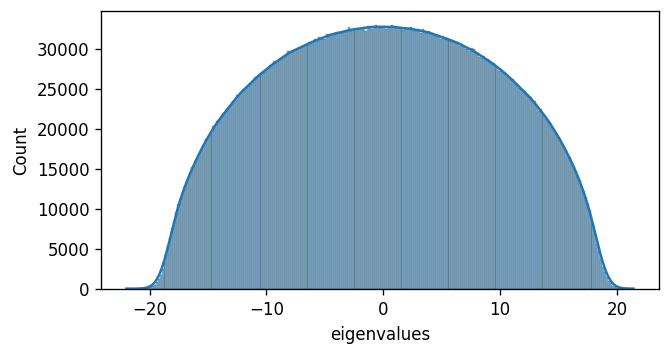

In [ ]:
plt.figure(figsize=(6,3), dpi=120)
sbn.histplot(results, kde=True)

plt.xlabel('eigenvalues')
plt.savefig('hist_80_100000.png', dpi=300)

plt.show()

In [ ]:
# vysledky jakz takz pro:
# - N = 80
# - num_of_experiments = 10000 a vice
# - diagonala z N(0,1), nediagonala z N(0,2)

## paralelize

In [15]:
import multiprocessing

# Define your function that returns a list with no input parameters
def your_function():
    # Replace this with the actual code of your function
    result = [1, 2, 3, 4, 5]
    return result

# Number of times you want to run the function in parallel
N = 4

# Create a pool of worker processes
pool = multiprocessing.Pool(processes=N)

# Use the pool to parallelize the function execution
results = pool.map(experiment, range(N))

# Close the pool to free up resources
pool.close()
pool.join()

# Now, 'results' will be a list of lists, each containing the output of your function
print(results)


[[1.4776293572186372, -1.8945478483914868, -0.8051880611396307], [1.4776293572186372, -1.8945478483914868, -0.8051880611396307], [1.4776293572186372, -1.8945478483914868, -0.8051880611396307], [-2.1719638719679697, 1.4246448406452221, 1.8880755796028015]]


## END

In [ ]:
from github import Github

# Your GitHub access token
access_token = 'YOUR_ACCESS_TOKEN'

# Your repository information
repository_owner = 'aleksejalex'
repository_name = 'temp_rndmtx'

# Path to the file you want to push
file_path = 'hist_80_1000000.png'

# Create a GitHub instance using your access token
g = Github(access_token)

# Get the repository
repo = g.get_user(repository_owner).get_repo(repository_name)

# Create a new commit to add the file to the repository
with open(file_path, 'rb') as file:
    content = file.read()
    repo.create_file(file_path, 'Commit message', content)

# Optionally, you can commit and push the changes to the repository branch
# branch = repo.get_branch('main')  # Replace 'main' with your branch name
# repo.update_file('path/to/im.jpg', 'Commit message', content, branch.commit.sha)


## saving and loading python objects

### save>>

In [ ]:
import pickle

# Your list data
my_list = [1, 2, 3, 4, 5]

# Specify the file name where you want to save the list
file_name = "my_list.pkl"

# Open the file in binary write mode and save the list using pickle
with open(file_name, "wb") as file:
    pickle.dump(my_list, file)

del(my_list)

### load>>

In [ ]:
import pickle

# Specify the file name from which to load the list
file_name = "my_list.pkl"

# Open the file in binary read mode and load the list using pickle
with open(file_name, "rb") as file:
    loaded_list = pickle.load(file)

# Now, loaded_list contains the data from the saved list
print(loaded_list)


[1, 2, 3, 4, 5]


In [ ]:
from github import Github

# Your GitHub access token
access_token = 'YOUR_ACCESS_TOKEN'

# Your repository information
repository_owner = 'your_username'
repository_name = 'your_repo_name'

# Path to the file you want to push
file_path = 'path/to/im.jpg'

# Create a GitHub instance using your access token
g = Github(access_token)

# Get the repository
repo = g.get_user(repository_owner).get_repo(repository_name)

# Create a new commit to add the file to the repository
with open(file_path, 'rb') as file:
    content = file.read()
    repo.create_file('path/to/im.jpg', 'Commit message', content)

# Optionally, you can commit and push the changes to the repository branch
# branch = repo.get_branch('main')  # Replace 'main' with your branch name
# repo.update_file('path/to/im.jpg', 'Commit message', content, branch.commit.sha)


## paralel computing

In [ ]:
import multiprocessing

# Define your function that returns a list with no input parameters
def your_function(a):
    # Replace this with the actual code of your function
    result = [1, 2, 3, 4, 5]
    return result

# Number of times you want to run the function in parallel
N = 4

# Create a pool of worker processes
pool = multiprocessing.Pool(processes=N)

# Use the pool to parallelize the function execution
results = pool.map(your_function, range(N))

# Close the pool to free up resources
pool.close()
pool.join()

# Now, 'results' will be a list of lists, each containing the output of your function
print(results)


[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]
